In [1]:
# Toy wavelength solution

In [2]:
# Eqn. (7) in Brandt+ 2017 JATIS is only appropriate for grid of spectra

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

%matplotlib inline

In [4]:
# fake spectrum
stem_spec = '/Users/bandari/Documents/git.repos/rrlfe/src/model_spectra/rrmods_all/original_ascii_files'
spec_fake = pd.read_csv(stem_spec + '/700020m30.smo', delim_whitespace=True, names=['wavel','flux','noise'])

In [5]:
# number of training samples for generating mapping in the first place

N_data_pts = 100

# equivalent wavelength steps
training_channels = np.linspace(0,1000,N_data_pts)
training_wavel_steps = np.linspace(3900.,5299.,num=N_data_pts)

In [6]:
# polynomial fit

def func(x, coeff_0, coeff_1, coeff_2):
    
    return coeff_0*x**2 + coeff_1*x + coeff_2

In [7]:
# generate mapping

popt, pcov = curve_fit(func, xdata=training_channels, ydata=training_wavel_steps, p0=np.array([0.01,30,3.]))

In [8]:
# the actual measurement

extracted_channels = np.linspace(0,1000,len(spec_fake['flux']))
# pretend we've extracted the following in channel space
extracted_spec = spec_fake['flux'].values

In [9]:
# observation-specific wavelength soln

a0,a1,a2 = popt

wavel_soln = a0*np.power(extracted_channels,2.) + a1*extracted_channels + a2

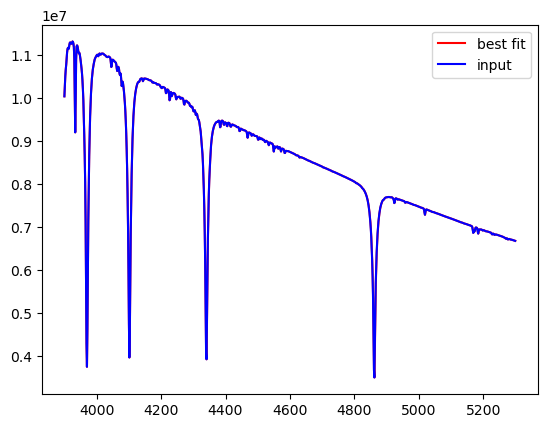

In [11]:
#plt.scatter(channel_coords[1], xy_coords[0])
plt.plot(wavel_soln,extracted_spec,color='red',label='best fit')
plt.plot(spec_fake['wavel'],spec_fake['flux'],color='blue',label='input')
plt.legend()
plt.show()